# ** I am starting data curation from MoDaC available files
# March 10, 2023

In [3]:
import importlib as imp
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [10,5]
#pal = sns.color_palette("Set2")
plt.rcParams['font.size'] = 5

In [31]:
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data

In [59]:
# Just run all cells with changing target you want
target = 'CYP2C9'

In [60]:
data_dir = "/mnt/projects/ATOM/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/"+target.upper()+'-ampl-1.1.0/'
!ls $data_dir

CHEMBL25-CYP2C9_human_IC50_26Nov2019.txt
cyp2c9_chembl_testset_base_smiles_union.csv
cyp2c9_dtc_smiles_active.csv
cyp2c9_dtc_smiles.csv
cyp2c9_dtc_testset_base_smiles_union_active.csv
cyp2c9_dtc_testset_base_smiles_union.csv
cyp2c9_excape_smiles_active.csv
cyp2c9_excape_smiles_active_th5.csv
cyp2c9_excape_smiles.csv
cyp2c9_excape_testset_base_smiles_union_active.csv
cyp2c9_excape_testset_base_smiles_union.csv
cyp2c9_union_testset_base_smiles.csv
cyp2c9_union_trainset_base_smiles.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_41d32748-810d-4cd2-9cdb-124b77f657f8.csv
scaled_descriptors


In [61]:
file= data_dir + target.lower()+'_dtc_smiles.csv' # exisitng MoDaC raw
dtc_raw_df=pd.read_csv(file,sep=",",engine="python",error_bad_lines=False) # Note that my orig_df is MoDaC files, you should use the raw file downloaded form ExcapeDB
print(dtc_raw_df.shape) # (14387, 13)
dtc_raw_df.head(5)

(3198, 38)


/home/sarkart4/miniconda3/envs/ampl-1.4.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,Inhibition of human CYP2C9,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,Inhibition of CYP2C9,Optimization of a potent class of arylamide co...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,Inhibition of CYP2C9 (unknown origin),"1-substituted (Dibenzo[b,d]thiophen-4-yl)-2-mo...",J. Med. Chem.,PUBLICATION,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,Inhibition of CYP2C9,From ApoA1 upregulation to BET family bromodom...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,Inhibition of CYP2C9,Discovery of 4-(5-(4-chlorophenyl)-2-methyl-3-...,J. Med. Chem.,PUBLICATION,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...


In [62]:
dtc_raw_df.columns

Index(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names', 'wildtype_or_mutant',
       'mutation_info', 'pubmed_id', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'activity_comment',
       'ep_action_mode', 'assay_format', 'assaytype', 'assay_subtype',
       'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments', 'PIC50', 'Unnamed: 0', 'CID', 'smiles',
       'rdkit_smiles'],
      dtype='object')

In [63]:
print("target_id=", dtc_raw_df['target_id'].unique())
print("gene_names=", dtc_raw_df['gene_names'].unique())

target_id= ['P11712']
gene_names= ['CYP2C9']



### Apply standard ATOM curation steps

In [64]:
imp.reload(dcf)
data=dtc_raw_df
column = 'PIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'compound_id'
smiles_col = 'rdkit_smiles'
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                     list_bad_duplicates, 
                                                     data, 
                                                     max_std, 
                                                     compound_id=compound_id, 
                                                     smiles_col=smiles_col)
# note: checked that this is already curated
[check_df.shape]
check_df.head()
# before (14387, 17)
# after (14281, 17)
# Which means MoDaC uploaded 'raw' data have duplicates! 

Bad duplicates removed from dataset
Dataframe size (3153, 42)
List of 'bad' duplicates removed
        compound_id     PIC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
2760  CHEMBL1079256  4.000000        4.500000  11.111111       0.707107
2759  CHEMBL1079256  5.000000        4.500000  11.111111       0.707107
2065     CHEMBL1109  5.376751        6.250422  13.977791       0.817252
2067     CHEMBL1109  5.376751        6.250422  13.977791       0.817252
2068     CHEMBL1109  7.096910        6.250422  13.542902       0.817252
2061     CHEMBL1109  3.497573        6.250422  44.042608       0.817252
611    CHEMBL129134  5.744727        4.244864  35.333613       2.121128
612    CHEMBL129134  2.745000        4.244864  35.333613       2.121128
1567      CHEMBL163  7.795880        6.552842  18.969450       1.757921
1566      CHEMBL163  5.309804        6.552842  18.969450       1.757921
1676    CHEMBL16596  9.301030        7.801030  19.228230       2.121320
1677    CHEMBL16596  6.301030        7.80

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,4.481486,NaN,0.0,0
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,5.000000,NaN,0.0,0
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,5.000000,NaN,0.0,0
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...,5.292430,NaN,0.0,0
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...,5.000000,NaN,0.0,0


In [65]:
check_df.columns

Index(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names', 'wildtype_or_mutant',
       'mutation_info', 'pubmed_id', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'activity_comment',
       'ep_action_mode', 'assay_format', 'assaytype', 'assay_subtype',
       'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments', 'PIC50', 'Unnamed: 0', 'CID', 'smiles',
       'rdkit_smiles', 'VALUE_NUM_mean', 'VALUE_NUM_std', 'Perc_Var',
       'Remove_BadDuplicate'],
      dtype='object')

In [66]:
# imp.reload(curate_data)
# targ_lst = [target.upper()]
# column = 'PIC50'
# num_bins = 20
# units = 'NM'
# filepath = ""
# for it in range(len(targ_lst)) :
#     title = targ_lst[it]
#     data=check_df
#     curate_data.summarize_data(column, num_bins, title, units, filepath, data)

## Use Kevin's "aggregate_assay_data()" 

In [67]:
imp.reload(curate_data)
tolerance=10
column='PIC50'   #'pXC50'; #'standard_value'
list_bad_duplicates='Yes'
max_std=1
agg_data=check_df
data=agg_data
print("before",data.shape)
temp_df=curate_data.aggregate_assay_data(data, value_col=column, output_value_col=None,
                             label_actives=True,
                             active_thresh=6, # val > 6 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                             id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')
                             #id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')
# Remove inf in curated_df
temp_df = temp_df[~temp_df.isin([np.inf]).any(1)]
print("after",temp_df.shape)
temp_df.head()

before (2824, 42)
after (2824, 5)


,compound_id,base_rdkit_smiles,relation,PIC50,active
0,BIUDJFOTQAVFMN-GOSISDBHSA-N,CC(C)n1cnc2c(NCc3ccc(-c4ccccn4)cc3)nc(NCC(O)CO...,>,5.301030,0
1,FYXKSKQPCGSNKY-UHFFFAOYSA-N,O=C(N1CCCC1)C(F)(F)c1ccc(-n2nc(C(F)(F)F)c3c2CC...,,5.397940,0
2,PFODPHDNBFSMOX-UHFFFAOYSA-N,O=C(O)c1cccc(C2=C(c3cc(Cl)ccc3OCc3ccc(F)cc3F)C...,,4.853872,0
3,HFTDLOVSQHYBFJ-UHFFFAOYSA-N,Cc1ccc(C(=O)Nc2ccon2)cc1NC(=O)c1cnn(-c2ccccc2F...,,4.638272,0
4,RSZNJMNZSVCMKK-UHFFFAOYSA-N,O=C(NCC1CCOCC1)c1cnc(Nc2ccc(Cl)cc2Cl)cc1C1CC1,,4.366532,0


In [68]:
# Add 'active' column to original data and save file to FRCE
merged = pd.merge(left=dtc_raw_df, right=temp_df, how='left', left_on='rdkit_smiles', right_on='base_rdkit_smiles')
merged = merged.drop(columns=['PIC50_y', 'base_rdkit_smiles', 'compound_id_y'])
merged = merged.rename(columns={'PIC50_x':'pIC50', 'compound_id_x':'compound_id'})
print(merged.columns)
merged.head(5)

Index(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names', 'wildtype_or_mutant',
       'mutation_info', 'pubmed_id', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'activity_comment',
       'ep_action_mode', 'assay_format', 'assaytype', 'assay_subtype',
       'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments', 'pIC50', 'Unnamed: 0', 'CID', 'smiles',
       'rdkit_smiles', 'relation', 'active'],
      dtype='object')


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,journal,doc_type,annotation_comments,pIC50,Unnamed: 0,CID,smiles,rdkit_smiles,relation,active
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,,0.0
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,>,0.0
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,>,0.0
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...,,0.0
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...,>,0.0


In [69]:
merged.active.value_counts()

0.0    2885
1.0     275
Name: active, dtype: int64

In [70]:
merged.to_csv(data_dir +target.lower()+'_dtc_smiles_active.csv')

# Add 'active' column to testset

In [71]:
dtc_raw_active = pd.read_csv(data_dir + target.lower()+'_dtc_smiles_active.csv' ,sep=",")
print(dtc_raw_active.shape)
dtc_raw_active.head(2)

(3198, 41)


,Unnamed: 0,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,...,journal,doc_type,annotation_comments,pIC50,Unnamed: 0.1,CID,smiles,rdkit_smiles,relation,active
0,0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,NaN,0.0
1,1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,>,0.0


In [72]:
dtc_test_df = pd.read_csv(data_dir + target.lower()+'_dtc_testset_base_smiles_union.csv' ,sep=",")
dtc_test_df.active.value_counts()

1    336
0     14
Name: active, dtype: int64

In [73]:
dtc_test_df.shape

(350, 5)

In [74]:
dtc_test_df = dtc_test_df.drop(columns = ['active'])
print(dtc_test_df.shape) # Note: wrong 'active' column, will be marked correctly in next step
dtc_test_df.head(2)

(350, 4)


,PIC50,base_rdkit_smiles,compound_id,relation
0,4.522879,CN(C1CCc2c(c3ccncc3n2CC(=O)O)C1)S(=O)(=O)c1ccc...,UHMQYWPLWZKMOS-CQSZACIVSA-N,>
1,5.000000,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(-c3n[nH]...,LCGWKKYPAXXXPK-UHFFFAOYSA-N,>


In [75]:
# Add 'active' column and save file to FRCE
#merged = pd.merge(left=dtc_test_df, right=dtc_raw_active, how='left', left_on='base_rdkit_smiles', right_on='rdkit_smiles')
merged = dtc_test_df.merge(dtc_raw_active[['rdkit_smiles', 'active']], how = 'left', 
                           left_on = 'base_rdkit_smiles', right_on = 'rdkit_smiles').drop(columns = ['rdkit_smiles'])
print(merged.shape)
merged.head(2)

(386, 5)


,PIC50,base_rdkit_smiles,compound_id,relation,active
0,4.522879,CN(C1CCc2c(c3ccncc3n2CC(=O)O)C1)S(=O)(=O)c1ccc...,UHMQYWPLWZKMOS-CQSZACIVSA-N,>,0.0
1,5.000000,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(-c3n[nH]...,LCGWKKYPAXXXPK-UHFFFAOYSA-N,>,0.0


In [76]:
merged.active.value_counts()

0.0    351
1.0     31
Name: active, dtype: int64

In [77]:
merged.to_csv(data_dir +target.lower()+'_dtc_testset_base_smiles_union_active.csv')

# Plot pIC50 for 'Active' column from our labelling (column='active')

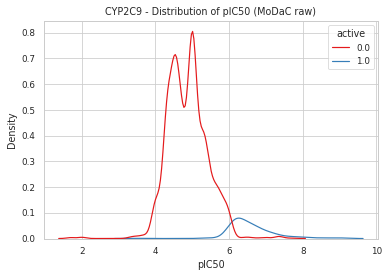

In [78]:
#plot pIC50 distribution based on our 'active' labelling (ModDaC raw)
raw = pd.read_csv(data_dir +target.lower()+'_dtc_smiles_active.csv')
fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(data=raw, x="pIC50", hue="active", palette="Set1")
plt.title(target.upper()+' - Distribution of pIC50 (MoDaC raw)')
plt.xlabel('pIC50')
plt.show()

# Use active_threashold=5 in aggregate_assay_data()

In [79]:
imp.reload(curate_data)
tolerance=10
column='PIC50'   #'pXC50'; #'standard_value'
list_bad_duplicates='Yes'
max_std=1
agg_data=check_df
data=agg_data
print("before",data.shape)
temp_df1=curate_data.aggregate_assay_data(data, value_col=column, output_value_col=None,
                             label_actives=True,
                             active_thresh=5, # val > 5 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                             id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')
                             #id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')
# Remove inf in curated_df
temp_df1 = temp_df1[~temp_df1.isin([np.inf]).any(1)]
print("after",temp_df1.shape)
temp_df1.head()

before (2824, 42)
after (2824, 5)


,compound_id,base_rdkit_smiles,relation,PIC50,active
0,BIUDJFOTQAVFMN-GOSISDBHSA-N,CC(C)n1cnc2c(NCc3ccc(-c4ccccn4)cc3)nc(NCC(O)CO...,>,5.301030,1
1,FYXKSKQPCGSNKY-UHFFFAOYSA-N,O=C(N1CCCC1)C(F)(F)c1ccc(-n2nc(C(F)(F)F)c3c2CC...,,5.397940,1
2,PFODPHDNBFSMOX-UHFFFAOYSA-N,O=C(O)c1cccc(C2=C(c3cc(Cl)ccc3OCc3ccc(F)cc3F)C...,,4.853872,0
3,HFTDLOVSQHYBFJ-UHFFFAOYSA-N,Cc1ccc(C(=O)Nc2ccon2)cc1NC(=O)c1cnn(-c2ccccc2F...,,4.638272,0
4,RSZNJMNZSVCMKK-UHFFFAOYSA-N,O=C(NCC1CCOCC1)c1cnc(Nc2ccc(Cl)cc2Cl)cc1C1CC1,,4.366532,0


In [80]:
# Add 'active' column to original data and save file to FRCE
merged = pd.merge(left=dtc_raw_df, right=temp_df1, how='left', left_on='rdkit_smiles', right_on='base_rdkit_smiles')
merged = merged.drop(columns=['PIC50_y', 'base_rdkit_smiles', 'compound_id_y'])
merged = merged.rename(columns={'PIC50_x':'pIC50', 'compound_id_x':'compound_id'})
print(merged.shape)
print(merged.active.value_counts())
merged.to_csv(data_dir +target.lower()+'_dtc_smiles_active_th5.csv')
merged.head(5)

(3198, 40)
0.0    2026
1.0    1134
Name: active, dtype: int64


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,journal,doc_type,annotation_comments,pIC50,Unnamed: 0,CID,smiles,rdkit_smiles,relation,active
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,,0.0
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,>,0.0
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,>,0.0
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...,,1.0
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,J. Med. Chem.,PUBLICATION,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...,>,0.0


# plot pIC50 distribution  with active_threashold=5


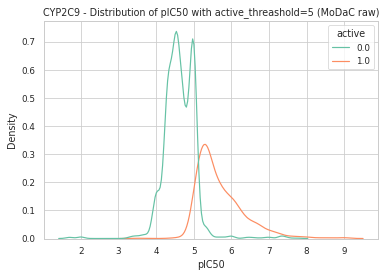

In [81]:
raw = pd.read_csv(data_dir +target.lower()+'_dtc_smiles_active_th5.csv')
fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(data=raw, x="pIC50", hue="active", palette="Set2")
plt.title(target.upper()+' - Distribution of pIC50 with active_threashold=5 (MoDaC raw)')
plt.xlabel('pIC50')
plt.show()